In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:verdana;"> <center>Animal Classification With ResNet50 From Scratch 🐴 🐕‍ 🐘 😹 </center> </h1>
<p><center style="color:#159364; font-size:30px; font-family:cursive;">Lets dive in to this</center></p>


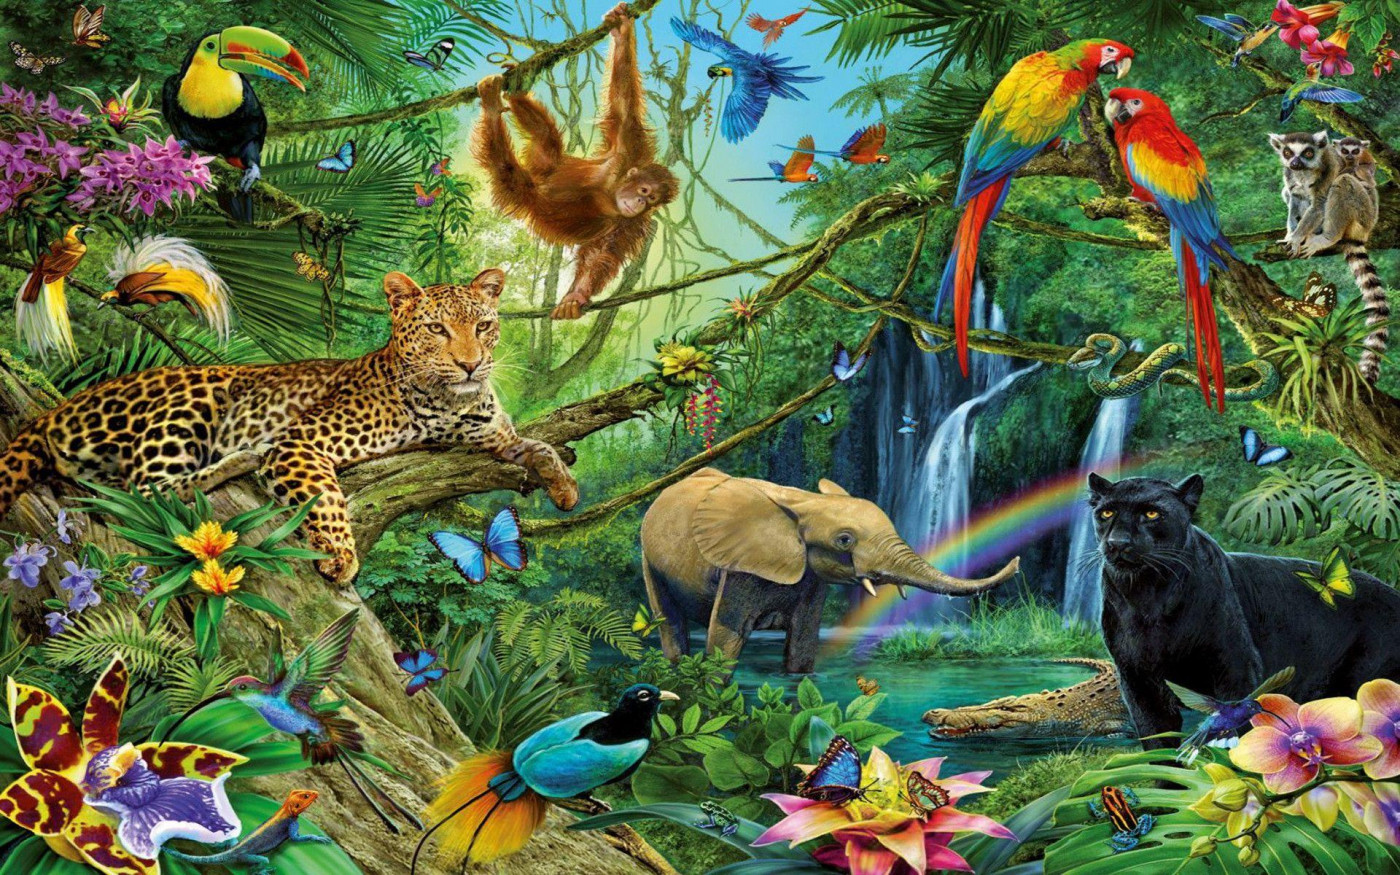

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Please Vote Up if You Like this Note book 🙏
 </div

# Table of Contents

* [1 Introduction](#1)

* [2 Importing Libraries](#2)

    - [2.1  Setting Path ](#2.1)
    
    - [2.2  Importing Data ](#2.2)
    
* [3 Data Distribution of whole Data  ](#3)

* [Siplting the Data into Train test and Val ](#4)

    - [4.1 Distributation of Train Data](#4.1)
    
    - [4.2 Distributation of val Data](#4.2)
    

* [5 Displaying Images](#5)

* [6 Image Data Generator](#6)

* [ResNet 50](#7)

   -[7.1 Identity Block](#7.1)
     
    - [7.2 Convolution  Block](#7.2)
    
    -[7.3 Final Model](#7.3)
     
* [8 Transfer Learning](#8)
 
    
 * [9 Training of Model](#9)
 
 
 * [10 Plotting the Result](#10)
 
 
 * [ 11 Prediction](#11)
 
 
 * [ 12 Confusion Matrix](#12)
 
 
 * [ 13 Prediction comparison](#13)
       


 <h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px">   1. IntroDuction </h1>
 
 <span style="font-family:cursive;font-size:25px;"> In this notebook, we will learn how to classify images of Animals by  developing ResNet 50 From Scratch</span>

<span style="font-family:cursive;font-size:15px;"> What we will learn:. </span>

<span style="font-family:cursive;font-size:15px;"> Load the images.. </span>

<span style="font-family:cursive;font-size:15px;"> Visulaise the Data distribution of all data.. </span>

<span style="font-family:cursive;font-size:15px;"> Develop ResNet 50 From Scratch. </span>


<span style="font-family:cursive;font-size:15px;">Train The Model. </span>

<span style="font-family:cursive;font-size:15px;">Graph the training loss and validation loss. </span>

<span style="font-family:cursive;font-size:15px;">Predict the results. </span>

<span style="font-family:cursive;font-size:15px;">Confusion Matrix </span>

<span style="font-family:cursive;font-size:15px;">Calssification Report. </span>

<span style="font-family:cursive;font-size:15px;">Prediction Comparison. </span>








<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Installing Some of the Libraries </div

In [1]:
! pip install split-folders

 <h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px">   2. Importing Libraries </h1>
           
<span style="font-family:cursive;font-size:25px;"> We are Importing Libraries. </span>

<span style="font-family:cursive;font-size:15px;"> Libraries which need for. </span>

<span style="font-family:cursive;font-size:15px;"> Image Processing. </span>

<span style="font-family:cursive;font-size:15px;"> Data visualization. </span>

<span style="font-family:cursive;font-size:15px;"> Making Model Architecture. </span>





In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 



<h1 id="2.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2.1 Setting Path </h1>

In [4]:
data_dir = "../input/animals10/raw-img"
data_dir = pathlib.Path(data_dir)



<h1 id="2.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  2.2 Importing Images </h1>

In [5]:
Total_Images = glob.glob('../input/animals10/raw-img/*/*.jpeg')
print("Total Number of Images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images 24209


In [6]:
Total_Df = pd.DataFrame()

Total_Df['FileName'] = Total_Images.map(lambda ImageName :ImageName.split("H")[-1])

Total_Df['ClassId'] = Total_Images.map(lambda ImageName :ImageName.split("/")[-2])

Total_Df.head()

FileName  ClassId
0                                           aJ4.jpeg  cavallo
1  ../input/animals10/raw-img/cavallo/OIP-TPYKs3X...  cavallo
2                                           aE2.jpeg  cavallo
3                                           aEK.jpeg  cavallo
4                                           aFj.jpeg  cavallo

In [7]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

cane          4863
ragno         4497
gallina       3098
cavallo       2623
mucca         1866
scoiattolo    1862
farfalla      1650
pecora        1444
gatto         1227
elefante      1079
Name: ClassId, dtype: int64

 <h1  id="3" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px">  3. Total  Data Distribution  </h1>
           
<span style="font-family:cursive;font-size:25px;"> Below there are Two Charts. </span>

<span style="font-family:cursive;font-size:15px;">Bar Chart. </span>

<span style="font-family:cursive;font-size:15px;"> Pie Chart. </span>

<span style="font-family:cursive;font-size:15px;"> The data is not equally dsitributed. </span>

<span style="font-family:cursive;font-size:15px;"> Cavallo has the Highest Percentage of the data which is 20.1%. </span>

<span style="font-family:cursive;font-size:15px;"> farfalla has the lowest Percentage of the data which is 4.46%. </span>

In [8]:


fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()




In [9]:

fig=px.pie(Class_Id_Dist_Total.head(10),values= 'ClassId', names=Total_Df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()




 <h1  id="4" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  4.Siplting the Data into Train test and Val </h1>

<span style="font-family:cursive;font-size:25px;"> Splitting The data by using Split Folders. </span>

In [10]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 26179 files [03:10, 137.09 files/s]


 <h5   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px"> setting Path </h5>

In [11]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [12]:
train_image1 = glob.glob('./output/train/*/*.jpeg')

Total_TrainImages = train_image1 
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpeg')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpeg')

Total_ValImages = Val_image1 
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  19366
Total number of test images:  2447
Total number of val images:  2396


           
<span style="font-family:cursive;font-size:25px;"> Data is Distributed in Three Parts. </span>

<span style="font-family:cursive;font-size:15px;">Total Number of Training Images 19366 </span>

<span style="font-family:cursive;font-size:15px;"> Total Number of Test Images 2447. </span>

<span style="font-family:cursive;font-size:15px;"> Total Number of Val Images 2396. </span>

In [13]:
random_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()



In [14]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

Filename ClassId
0  OIP-XCCk0b6fRU-1L2Nl7CMPcAHaFc.jpeg  pecora
1  OIP-EQoDxNznPiL0-9XD0inanQHaE8.jpeg  pecora
2  OIP-7u1smEuDDPtenwFI1O1QqgHaFj.jpeg  pecora
3  OIP-6vuyaHFRTHvNtJpUlOEewAHaJy.jpeg  pecora
4  OIP-rs8d8czZQKn99e0b_QxQngHaEK.jpeg  pecora

In [15]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

cane          3890
ragno         3600
gallina       2478
cavallo       2098
mucca         1492
scoiattolo    1489
farfalla      1324
pecora        1155
gatto          984
elefante       856
Name: ClassId, dtype: int64



<h1 id="4.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4.1 Distribution of Train Data </h1>
           
 <span style="font-family:cursive;font-size:25px;"> Below there are Two Charts of Training Data Set. </span>

<span style="font-family:cursive;font-size:15px;">Bar Chart. </span>

<span style="font-family:cursive;font-size:15px;"> Pie Chart. </span>

<span style="font-family:cursive;font-size:15px;"> The data is not equally dsitributed. </span>

In [16]:


fig = go.Figure(go.Bar(
            x=class_id_distribution_Train.values,
            y=class_id_distribution_Train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [17]:
fig=px.pie(class_id_distribution_Train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()



<h1 id="4.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  4.2 Distribution Of Validation Data.</h1>

<span style="font-family:cursive;font-size:25px;"> Below there are Two Charts of Validation Data Set. </span>

<span style="font-family:cursive;font-size:15px;">Bar Chart. </span>

<span style="font-family:cursive;font-size:15px;"> Pie Chart. </span>

<span style="font-family:cursive;font-size:15px;"> The data is not equally dsitributed. </span>

In [18]:
val_image_names = pd.Series(Total_ValImages)
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: img_name.split("/")[-2])

val_df.head()

Filename ClassId
0  OIP-v-wtmJOYa2g1r__75MVHdgHaEz.jpeg  pecora
1  OIP-Corh6lOI-2Xad2mtsbvTVgHaDt.jpeg  pecora
2  OIP-TtLKMRLkd31KhB4KQ1XJkwHaF-.jpeg  pecora
3  OIP-BBzPe1yk8z2gj4evft1klwHaEK.jpeg  pecora
4  OIP-5iFazuR0LhqfYK0l8uitVgHaEK.jpeg  pecora

In [19]:
class_id_distribution_val = val_df['ClassId'].value_counts()
class_id_distribution_val.head(10)

cane          486
ragno         449
gallina       309
cavallo       262
mucca         186
scoiattolo    186
farfalla      164
pecora        133
gatto         113
elefante      108
Name: ClassId, dtype: int64

In [20]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_val.values,
            y=class_id_distribution_val.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Validation Data in Bars',font_size=15,title_x=0.45)

fig.show()


In [21]:
fig=px.pie(class_id_distribution_val.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Validation Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()





 <h1  id="5" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  5 Displaying The Images </h1>
           
           




<span style="font-family:cursive;font-size:15px;">We are going to display Some of the Images of different Classes </span>



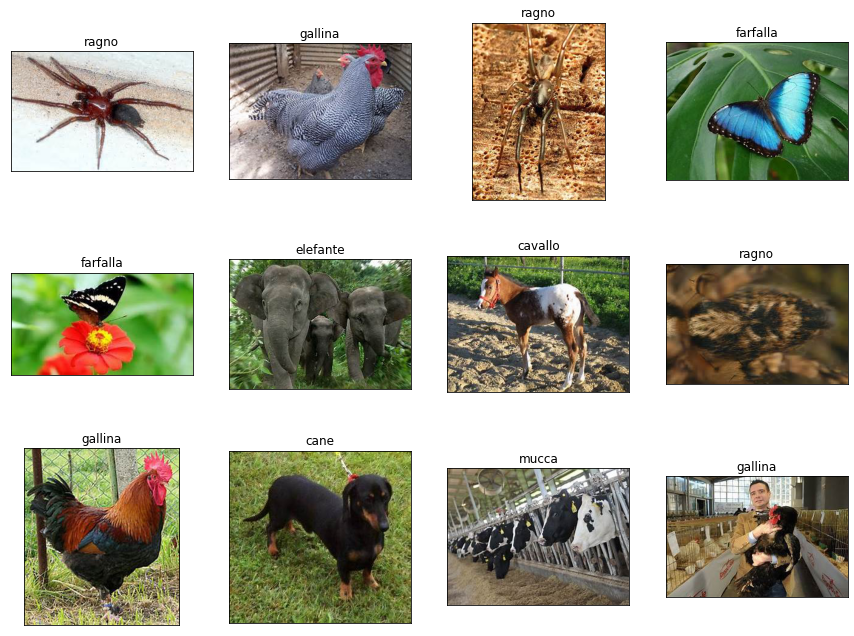

In [22]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Data Anaylsis Part Has been Done 🏆 , Now we going Prepare Data for the Model
</div

 <h1  id="6" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 6 Image Data Generator </h1>
 
 

<span style="font-family:cursive;font-size:15px;">            
Takes the path to a directory & generates batches of augmented data</span>


<span style="font-family:cursive;font-size:15px;">shear_range = 0.1 : shear range 10% </span>


<span style="font-family:cursive;font-size:15px;">zoom_range = 0.2 : zoom range 20% </span>


<span style="font-family:cursive;font-size:15px;">
width_shift_range = 0.1 : Randomly move the original image horizontally within 10% of the width</span>



<span style="font-family:cursive;font-size:15px;">
    
height_shift_range=0.1 : Randomly move the original image vertically within 10% of the width  </span>














          
           

In [23]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 20938 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


 <h1  id="7" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  7 ResNet50 </h1>

![ResNet.png](https://raw.githubusercontent.com/106AbdulBasit/ResNet50-Weights/main/ResNetArchitecture.jpg)


<span style="font-family:cursive;font-size:15px;">It is very important to understand about the ResNet. The advancment in th computer vison task was due to the breakthrough achivement of the ResNet architecture.</span>

<span style="font-family:cursive;font-size:15px;">The architecture allows you to go deeper in the layers which is 150+ layers. </span>

<span style="font-family:cursive;font-size:15px;"> It is an innovative neural network that was first introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2015 computer vision research paper titled ‘Deep Residual Learning for Image Recognition’. </span>

<span style="font-family:cursive;font-size:15px;">More Details about the paper can be found here </span>
[Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385?context=cs)

<span style="font-family:cursive;font-size:15px;"> Before Resnet, In theory the more you have layers the loss value reduces and accuracy increase, but in pratically that did not happen. The more you have layers the accuracy was decreasing. </span>


<span style="font-family:cursive;font-size:15px;">  Convolutional Neural Network has the Problem of the "Vanishing Gradient Problem" During the Backpropagation the value of gradient descent decraeses and there is hardly changes in the weights. To over come this problem Resnet Comes with the Skip Connections. </span>

<span style="font-family:cursive;font-size:15px;">Skip Connection — Adding the original input to the output of the convolutional block. </span>


 <h4  id="7.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  7.1 Identity Block </h4>

![Identty.png](https://raw.githubusercontent.com/106AbdulBasit/ResNet50-Weights/main/Identty.png)

<span style="font-family:cursive;font-size:15px;">The value of ‘x’ is added to the output layer if and only if the. </span>

<span style="font-family:cursive;font-size:25px;">Input Size == Output Size. </span>




In [24]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

 <h4  id="7.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  7.2 Convolutional Block </h4>

![convolution.png](https://raw.githubusercontent.com/106AbdulBasit/ResNet50-Weights/main/convolution.png)

<span style="font-family:cursive;font-size:25px;"> if Input Size != Output Size. </span>

<span style="font-family:cursive;font-size:15px;"> we add a ‘convolutional block’ in the shortcut path to make the input size equal to output size.. </span>


In [25]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

 <h4  id="7.3" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 7.3 Final Model </h4>

In [26]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [27]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [28]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 10,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [29]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

<span style="font-family:cursive;font-size:15px;">  From Here you can compile the model and then you can train your images from scratch or you can load the weights . To do this Do the Follow steps </span>

<span style="font-family:cursive;font-size:15px;"> Step 1   "base_model.load_weights("Path to file")" . </span>

<span style="font-family:cursive;font-size:15px;"> Step 2   "for layer in base_model.layers:
    layer.trainable = False" . </span>

<span style="font-family:cursive;font-size:15px;"> Step 3   "model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=["accuracy"])" . </span>
    
    
    
<span style="font-family:cursive;font-size:15px;">  Run the Model . </span>

<span style="font-family:cursive;font-size:15px;">  Since  the weights file is not uploaded , you can do it on your colab by perfoming all these steps . </span>


<span style="font-family:cursive;font-size:15px;">  I will Import the models so this way you can also have the idea of how to import model . </span>

 <h4  id="8" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  8 Transfer Learning </h4>


<span style="font-family:cursive;font-size:15px;">A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task such as Image Net Data set. The weights of the pre trained model can be ustilse for the classification of other task. You don't have to train your model from scratch. </span>



<span style="font-family:cursive;font-size:15px;">The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model and can be use for other different task of classification. The feature map of Pre Trained Model can be used.. </span>

In [30]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94781440/94765736 [==============================] - 0s 0us/step


In [31]:
for layers in modelT.layers:
    layers.trainable = False

In [32]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

 <h4  id="9" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  9 Training The Model </h4>

<span style="font-family:cursive;font-size:15px;">  A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). </span>

<span style="font-family:cursive;font-size:15px;">  Early Stopping is use to prevent model from over fitting. </span>

In [33]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [34]:
mc = ModelCheckpoint('./kaggle/working/model.h5', monitor='val_accuracy', mode='max' )

In [35]:
History = modelT.fit_generator(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[mc,es])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/15
655/655 [==============================] - 276s 408ms/step - loss: 4.9498 - accuracy: 0.8284 - val_loss: 3.7311 - val_accuracy: 0.8982


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/15
655/655 [==============================] - 263s 402ms/step - loss: 5.0420 - accuracy: 0.8798 - val_loss: 4.2715 - val_accuracy: 0.9189
Epoch 3/15
655/655 [==============================] - 263s 401ms/step - loss: 4.6757 - accuracy: 0.9017 - val_loss: 4.4577 - val_accuracy: 0.9254
Epoch 4/15
655/655 [==============================] - 262s 401ms/step - loss: 5.0642 - accuracy: 0.9051 - val_loss: 4.9550 - val_accuracy: 0.9285
Epoch 5/15
655/655 [==============================] - 263s 401ms/step - loss: 4.9197 - accuracy: 0.9143 - val_loss: 6.2225 - val_accuracy: 0.9158
Epoch 6/15
655/655 [==============================] - 262s 400ms/step - loss: 5.0203 - accuracy: 0.9175 - val_loss: 5.5259 - val_accuracy: 0.9269
Epoch 7/15
655/655 [==============================] - 259s 395ms/step - loss: 4.9198 - accuracy: 0.9223 - val_loss: 6.7746 - val_accuracy: 0.9227
Epoch 8/15
655/655 [==============================] - 261s 399ms/step - loss: 4.9769 - accuracy: 0.9250 - val_loss: 6.7949 -

<span style="font-family:cursive;font-size:25px;"> Train your model by making "layers.trainable = False >> layers.trainable = True" Which is code block of 31 I had done it in previous version and results were different. </span>

<span style="font-family:cursive;font-size:25px;"> Since it has more layers then VGG19 ,or some other model it would take more time to have the better results. </span>

<span style="font-family:cursive;font-size:25px;"> I would suggest you to run this model on different epocs ,like 50,100 and see what are the results. </span>

 <h4  id="10" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  10 Plotting the Graph and Result </h4>

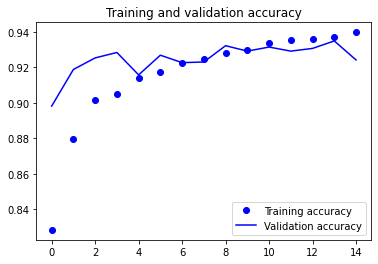

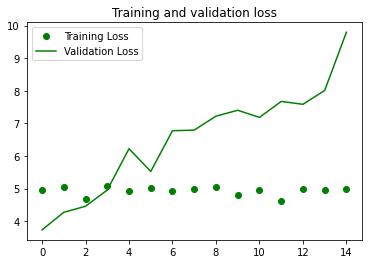

In [36]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 <h4  id="11" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 11 Prediction  </h4>

In [37]:
 test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

83/83 [==============================] - 8s 94ms/step - loss: 9.0090 - accuracy: 0.9288
Loss: 900.896
Accuracy: 92.882


<span style="font-family:cursive;font-size:25px;">The prediction compariosn code is taken from  </span>
[Quadeer Shaikh ](https://www.kaggle.com/quadeer15sh).

<span style="font-family:cursive;font-size:25px;">Do Check out his note book He done an interesting work on  Grad-CAM on this data set. </span>

[link to his Note Book ](https://www.kaggle.com/code/quadeer15sh/grad-cam-what-do-cnns-see)


In [38]:
from sklearn.metrics import classification_report

In [39]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [40]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       487
           1       0.91      0.92      0.92       263
           2       0.90      0.95      0.93       146
           3       0.90      0.99      0.94       212
           4       0.96      0.96      0.96       311
           5       0.93      0.90      0.91       168
           6       0.74      0.93      0.82       188
           7       0.99      0.75      0.86       182
           8       1.00      0.94      0.97       483
           9       0.95      0.95      0.95       187

    accuracy                           0.93      2627
   macro avg       0.92      0.92      0.92      2627
weighted avg       0.93      0.93      0.93      2627



In [42]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [43]:
filenames = test_generator.filenames

In [44]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual predicted   Same
0  cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg   cane      cane   True
1  cane/OIP--DQsiH-9LglDNlEvJpZQZQHaFw.jpeg   cane     gatto  False
2  cane/OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg   cane  elefante  False
3  cane/OIP--Z2dg_o5sGo8jua-d6vSagHaEK.jpeg   cane      cane   True
4  cane/OIP--hrVyxBHfXGXIpLKB_ld2AHaEK.jpeg   cane      cane   True
5  cane/OIP--iPPduM2--389E1lozUz_QHaFj.jpeg   cane     mucca  False
6  cane/OIP--khXa4p9B3QV8JmsHX29hgHaEK.jpeg   cane      cane   True
7  cane/OIP-00zvckpZ8XDEzk-Fv4HjkQHaGL.jpeg   cane      cane   True
8  cane/OIP-0ERf2k91vjSIq_POpXYImwHaFj.jpeg   cane      cane   True
9  cane/OIP-0G1lmzPnTshwQJ_IEMNHgQHaFR.jpeg   cane      cane   True

In [45]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

 <h4  id="12" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 12 Prediction  comparison </h4>

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"../input/animals10/raw-img/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

<h1  style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  correctly classified.</h1>

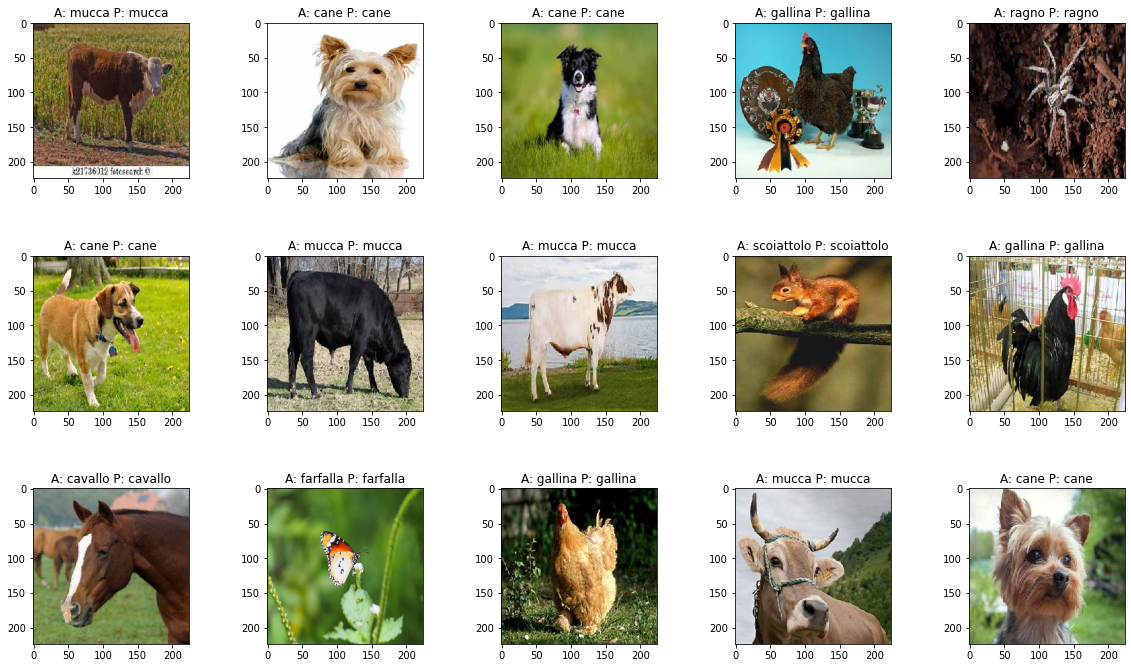

In [47]:
display_images(val_df[val_df['Same']==True])

<h1  style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  Missclassified .</h1>

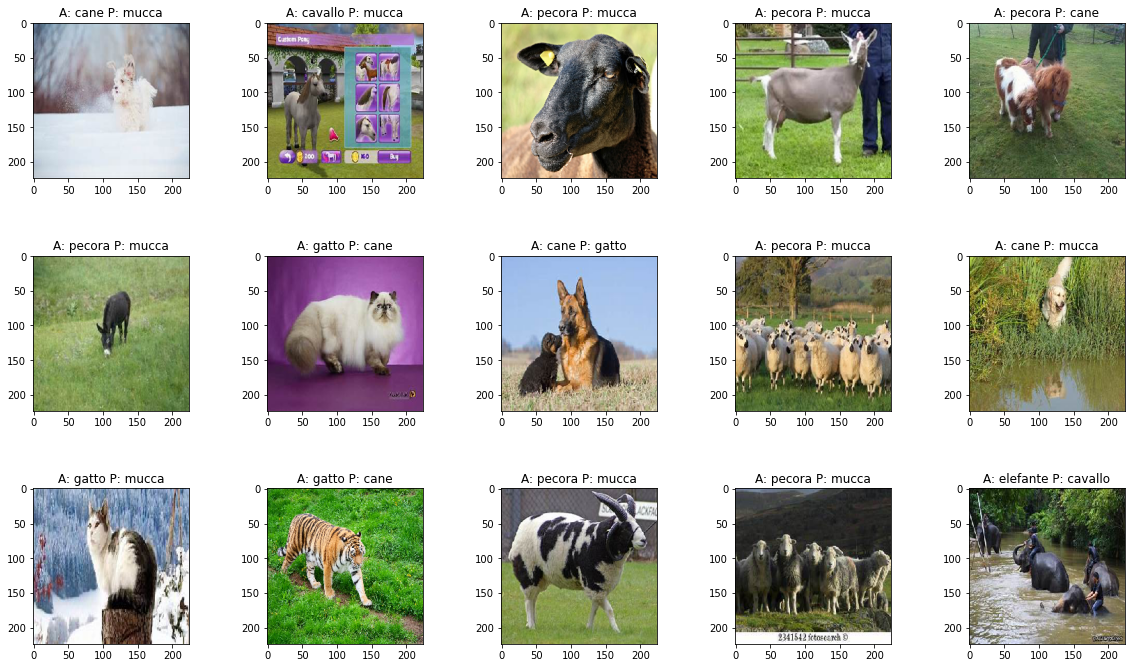

In [48]:
display_images(val_df[val_df['Same']!=True])

 <h4  id="13" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 13 confusion Matrix </h4>

In [49]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [50]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[453   6   4   1   6   6   9   0   0   2]
 [  1 243   1   1   0   1  15   1   0   0]
 [  0   1 139   0   0   1   3   0   0   2]
 [  0   0   0 209   0   1   0   0   2   0]
 [  4   3   0   1 300   1   2   0   0   0]
 [ 11   0   1   0   0 151   1   0   0   4]
 [  0  10   3   0   0   0 175   0   0   0]
 [  4   2   6   0   1   0  32 137   0   0]
 [  4   1   0  18   2   0   1   0 455   2]
 [  3   0   0   1   3   2   0   0   0 178]]


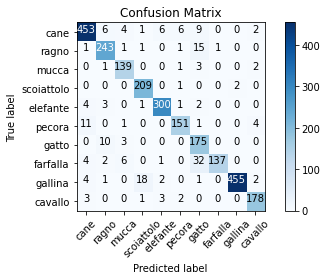

In [51]:
cm_plot_labels = ['cane', 'ragno', 'mucca', 'scoiattolo', 'elefante', 'pecora', 'gatto', 'farfalla', 'gallina', 'cavallo']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

<span style="font-family:cursive;font-size:25px;"> What's Next??. </span>

<span style="font-family:cursive;font-size:25px;"> Will  add some new feature in this note book. </span>


<span style="font-family:cursive;font-size:25px;"> For You do some modification to this note book. </span>

<span style="font-family:cursive;font-size:25px;"> Watch in video explanation. </span>
[Vedio](https://www.youtube.com/channel/UCSAw-QDHdXjrAMpg7-TELVA)


<span style="font-family:cursive;font-size:25px;"> Brain Tumor Classification. </span>
[Link](https://www.kaggle.com/code/abdulbasitniazi/resnet50-eda-cmatrix)


<span style="font-family:cursive;font-size:25px;"> Efficeint NetB7 . </span>
[Link](https://www.kaggle.com/code/abdulbasitniazi/enetb7-94-datavisualise-confusionmatrix)


<span style="font-family:cursive;font-size:25px;">  Basic CNN, Dog VS Cat. </span>
[Link](https://www.kaggle.com/code/abdulbasitniazi/vs-cnn-eda)

<span style="font-family:cursive;font-size:25px;"> Making NoteBook Beautiful. </span>
[Link](https://www.kaggle.com/code/abdulbasitniazi/making-notebook-beautiful)


<span style="font-family:cursive;font-size:25px;">  Follow me on Medium. </span>
[Medium](https://medium.com/@AB_Niazi)


<span style="font-family:cursive;font-size:25px;">  Connect on LinkedIn. </span>
[LinedIn ](https://www.linkedin.com/in/abdul-basit-201849b4/ttps://medium.com/@AB_Niazi)

